In [1]:
# Lucas Cunningham

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Covid19 has taken the world by storm, claiming the lives of over 6.5 million people since the
# first few cases back in 2020.  While the diligent work of doctors, researchers, medical staff
# of all kind, as well as cautionary measures of governments and the general public at large 
# have done wonders to minimize the disastrous effects of this pandemic, there is still more
# work to be done.  Due to the worldwide urgency to find a cure, information about the
# disease was a priority leading to medical facilities to attempting to predict who would be
# at highest risk for the deadly effects of the disease.  This could be done be identifying
# what such traits are and then seeing how those traits effect the people with the disease,
# in the hopes of being able to treat and protect as many people as possible.

In [3]:
df = pd.read_csv("Covid Data.csv")

# For this project, we are going to be looking at this dataset from clinics in Mexico 
# during the height of the Covid crisis and attempting to find correlations between various
# non-covid health risks of the patients and the results of their visits.

print(df.head(5))

   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO

In [4]:
print(df.columns)

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')


In [5]:
# From these categories, we can make two groups: a group of risk factors and a group of outcomes:
# (*Unless otherwise stated, each column is a binary column with 1 -> False and 2 -> True)

# Risks - 
#   Age    (*age in years)
#   Sex    (*1 -> Female and 2 -> Male)
#   Pneumonia
#   Pregnancy
#   Diabetes
#   COPD (Chronic Obstructive Pulmonary Disease)
#   Asthma
#   Inmsupr (Immunosuppressed)
#   Hypertension
#   Cardiovascular
#   Renal Chronic
#   Obesity
#   Other Diseases
#   Tobacco

list_of_binary_factors = ["SEX", "PNEUMONIA", "PREGNANT", "DIABETES", "COPD", "ASTHMA", "INMSUPR", 
                            "HYPERTENSION", "CARDIOVASCULAR", "RENAL_CHRONIC", "OBESITY", "OTHER_DISEASE", 
                            "TOBACCO"]
list_of_factors = list_of_binary_factors + ["AGE"]


# Outcomes -
#   Patient Type    (1 -> went home and 2 -> went to hospital)
#   Intubed
#   ICU
#   Date Died    (if patient died then in format dd-mm-yyyy, if patient lived, then "99-99-9999").

list_of_outcomes = ["PATIENT_TYPE", "INTUBED", "ICU", "DATE_DIED"]

# We will be comparing these factors in a heatmap farther down the page

In [6]:
# Additionally, we are going to clean up the data a bit before contiuning.

df.rename(columns = {'HIPERTENSION':'HYPERTENSION'}, inplace = True)
# fixing a typo from the downloaded csv

df = df.drop(columns=['USMER', 'MEDICAL_UNIT', 'CLASIFFICATION_FINAL'])
# these columns we not clear in their function or were not relavent to out initial problem.

In [7]:
def return_bool_died(date):
    if date == "9999-99-99" :
        return 2
    else :
        return 1

df["BOOL_DIED"] = df["DATE_DIED"].apply(return_bool_died)
df = df.drop(columns=["DATE_DIED"])

list_of_outcomes = ["PATIENT_TYPE", "INTUBED", "ICU", "BOOL_DIED"]       # updating the results to account for the name change.
print(df.head(5))

   SEX  PATIENT_TYPE  INTUBED  PNEUMONIA  AGE  PREGNANT  DIABETES  COPD  \
0    1             1       97          1   65         2         2     2   
1    2             1       97          1   72        97         2     2   
2    2             2        1          2   55        97         1     2   
3    1             1       97          2   53         2         2     2   
4    2             1       97          2   68        97         1     2   

   ASTHMA  INMSUPR  HYPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  \
0       2        2             1              2               2        2   
1       2        2             1              2               2        1   
2       2        2             2              2               2        2   
3       2        2             2              2               2        2   
4       2        2             1              2               2        2   

   RENAL_CHRONIC  TOBACCO  ICU  BOOL_DIED  
0              2        2   97          1  
1   

In [8]:
# In order to check for missing/inconsistant data, we are going to check for the number of unique 
# values in each group.

for i in df.columns :
    print(i + ":  " + str(len(df[i].unique())))

SEX:  2
PATIENT_TYPE:  2
INTUBED:  4
PNEUMONIA:  3
AGE:  121
PREGNANT:  4
DIABETES:  3
COPD:  3
ASTHMA:  3
INMSUPR:  3
HYPERTENSION:  3
OTHER_DISEASE:  3
CARDIOVASCULAR:  3
OBESITY:  3
RENAL_CHRONIC:  3
TOBACCO:  3
ICU:  4
BOOL_DIED:  2


In [9]:
# As we can see from the number of unique values, the majority of non-binary values (so ignoring age 
# and date_died) have extra values.

# For example: 
df["INTUBED"].unique()

array([97,  1,  2, 99], dtype=int64)

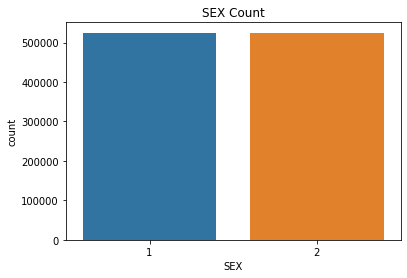

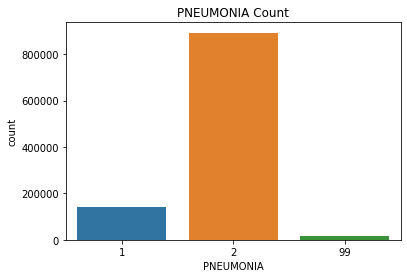

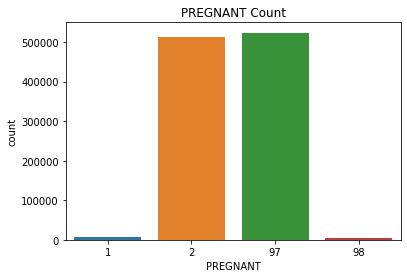

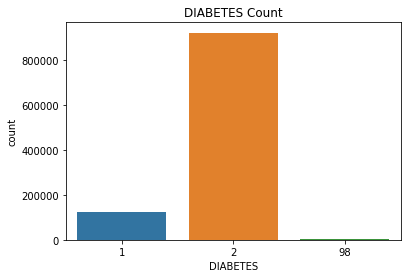

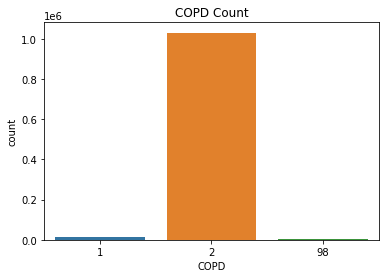

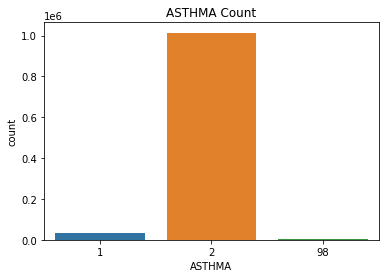

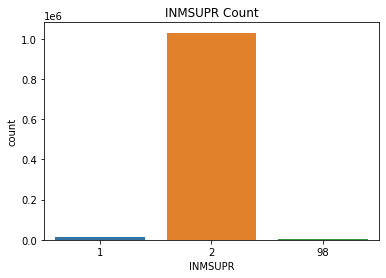

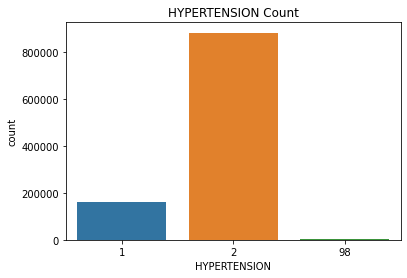

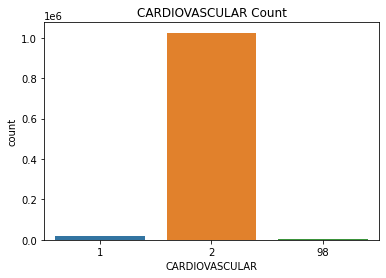

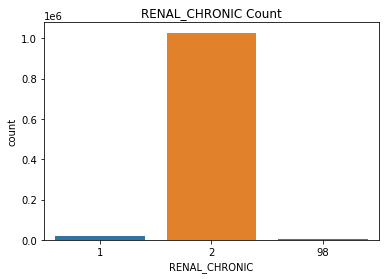

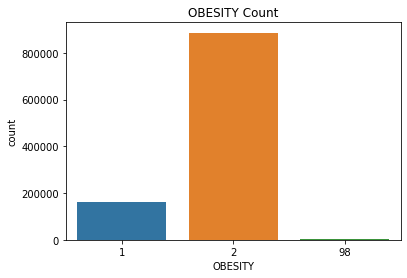

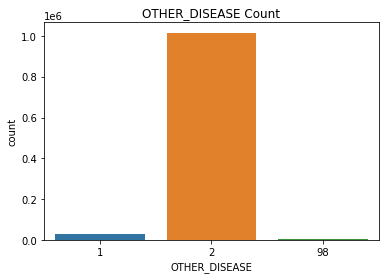

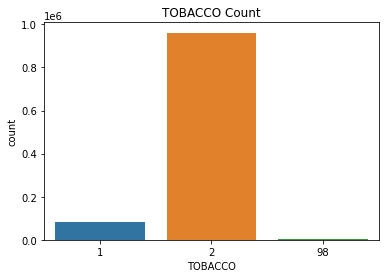

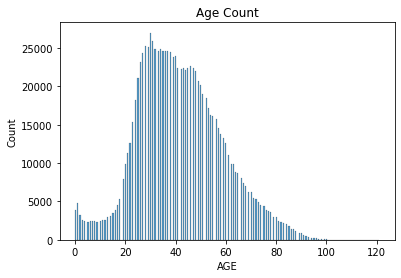

In [10]:
# Below, we are seeing all the visualations of each possible risk factor and how common each factor was.
# (Additionally, we can also see how)

for factor in list_of_binary_factors :
    sns.countplot(x=df[factor])
    plt.title(factor + " Count")
    plt.show()

sns.histplot(x=df["AGE"])
plt.title("Age Count")
plt.show()

In [11]:
# Now, in order to view our future heatmap with more clarity, we are going to remove these pieces
# of missing information

def convert_missing_data(input):
    if input == 1 or input == 2 :       
        return input
    else :
        return None            # None will signify all sorts of missing data


for factor in list_of_binary_factors :
    df[factor] = df[factor].apply(convert_missing_data)

In [12]:
# The following code below makes a identical dataframe, but changes the order of the columns in order to make 
# viewing the heatmap in the next section easier.

new_list = list_of_factors + list_of_outcomes

factors_and_death_df = df[new_list]

print(factors_and_death_df.columns)

Index(['SEX', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HYPERTENSION', 'CARDIOVASCULAR', 'RENAL_CHRONIC', 'OBESITY',
       'OTHER_DISEASE', 'TOBACCO', 'AGE', 'PATIENT_TYPE', 'INTUBED', 'ICU',
       'BOOL_DIED'],
      dtype='object')


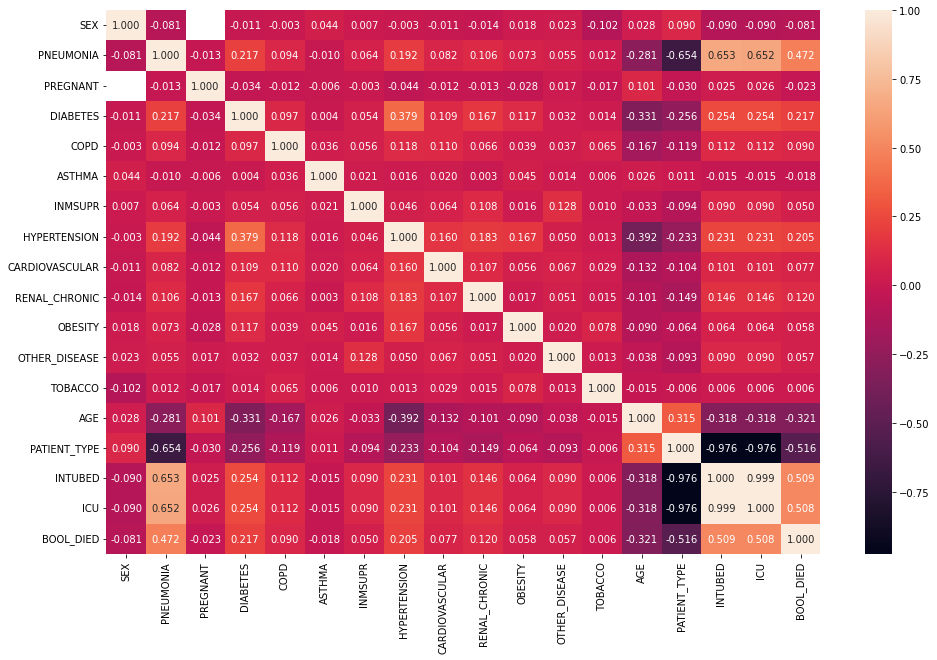

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(data=factors_and_death_df.corr(), annot=True, fmt=".3f")
plt.show()

In [14]:
# Here we can easier see all the relations between all columns of our dataframe.  From here, we can 
# identify that there are certain risk factors that have a significant impact on the mortality of 
# Covid19.  The greatest threats to surviving Covid19 shows to be Pneumonia, older age, Diabetes, 
# and Hypertension.  
#
# This graph also reveals other interesting information.  For example, looking at the relations between
# Patient_Type, Intubed, and ICU signifies that when a person is sent to the hospital (Patient_type = 1),
# they are almost certainly going to be receiving a ventilator (Intubed = 2) and being imited to the ICU
# (ICU = 2).
#
# Additionally, for nearly every single risk factor, there is a positive correlation with other rick
# factors, for example there is a 0.379 correlation between people who have diabetes and those who
# have hypertension.